# Analyse de l'incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence de la varicelle sont disponibles du site Web du Réseau Sentinelles. Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1991 et se termine avec une semaine récente.

In [5]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

Nous remplacons le téléchargement des données à chaque lancement du notebook par l'utilisation d'un fichier local (si celui-ci est présent). Cela permet de toujours travailler sur les mêmes donnéeset ainsi d'éviter d'éventuels problèmes dans le futur. Aves des fichiers de données plus lourds nous gagnons aussi le temps de téléchargement.

In [16]:
import os
fichiers_disponibles = os.listdir(os.getcwd())
if "incidence-PAY-7.csv" not in fichiers_disponibles:
    raw_data = pd.read_csv(data_url, skiprows=1)
    raw_data.to_csv("incidence-PAY-7.csv")
else:
    print("Fichier présent localement")
    raw_data = pd.read_csv("incidence-PAY-7.csv")
raw_data

Fichier présent localement


Unnamed: 0    week  indicator    inc  inc_low  inc_up  inc100  \
0              0  202031          7   1314       99    2529       2   
1              1  202030          7   1385       75    2695       2   
2              2  202029          7    841       10    1672       1   
3              3  202028          7    728        0    1515       1   
4              4  202027          7    986      149    1823       1   
5              5  202026          7    694        0    1454       1   
6              6  202025          7    228        0     597       0   
7              7  202024          7    388        0     959       1   
8              8  202023          7    558        1    1115       1   
9              9  202022          7    277        0     633       0   
10            10  202021          7    602       36    1168       1   
11            11  202020          7    824       20    1628       1   
12            12  202019          7    310        0     753       0   
13            13  202018          7    849       98    1600       1   
14            14  202017          7    272        0     658       0   
15            15  202016          7    758       78    1438       1   
16            16  202015          7   1918      675    3161       3   
17            17  202014          7   3879     2227    5531       6   
18            18  202013          7   7326     5236    9416      11   
19            19  202012          7   8123     5790   10456      12   
20            20  202011          7  10198     7568   12828      15   
21            21  202010          7   9011     6691   11331      14   
22            22  202009          7  13631    10544   16718      21   
23            23  202008          7  10424     7708   13140      16   
24            24  202007          7   8959     6574   11344      14   
25            25  202006          7   9264     6925   11603      14   
26            26  202005          7   8505     6314   10696      13   
27            27  202004          7   7991     5831   10151      12   
28            28  202003          7   5968     4100    7836       9   
29            29  202002          7   6534     4530    8538      10   
...          ...     ...        ...    ...      ...     ...     ...   
1518        1518  199126          7  17608    11304   23912      31   
1519        1519  199125          7  16169    10700   21638      28   
1520        1520  199124          7  16171    10071   22271      28   
1521        1521  199123          7  11947     7671   16223      21   
1522        1522  199122          7  15452     9953   20951      27   
1523        1523  199121          7  14903     8975   20831      26   
1524        1524  199120          7  19053    12742   25364      34   
1525        1525  199119          7  16739    11246   22232      29   
1526        1526  199118          7  21385    13882   28888      38   
1527        1527  199117          7  13462     8877   18047      24   
1528        1528  199116          7  14857    10068   19646      26   
1529        1529  199115          7  13975     9781   18169      25   
1530        1530  199114          7  12265     7684   16846      22   
1531        1531  199113          7   9567     6041   13093      17   
1532        1532  199112          7  10864     7331   14397      19   
1533        1533  199111          7  15574    11184   19964      27   
1534        1534  199110          7  16643    11372   21914      29   
1535        1535  199109          7  13741     8780   18702      24   
1536        1536  199108          7  13289     8813   17765      23   
1537        1537  199107          7  12337     8077   16597      22   
1538        1538  199106          7  10877     7013   14741      19   
1539        1539  199105          7  10442     6544   14340      18   
1540        1540  199104          7   7913     4563   11263      14   
1541        1541  199103          7  15387    10484   20290      27   
1542        1542  199102      

In [20]:
raw_data[raw_data.isnull().any(axis=1)]
data = raw_data

Il n'y a pas de données manquantes. 

Nos données utilisent une convention inhabituelle: le numéro de semaine est collé à l'année, donnant l'impression qu'il s'agit de nombre entier. C'est comme ça que Pandas les interprète.

Un deuxième problème est que Pandas ne comprend pas les numéros de semaine. Il faut lui fournir les dates de début et de fin de semaine. Nous utilisons pour cela la bibliothèque isoweek.

Comme la conversion des semaines est devenu assez complexe, nous écrivons une petite fonction Python pour cela. Ensuite, nous l'appliquons à tous les points de nos donnés. Les résultats vont dans une nouvelle colonne 'period'.

In [21]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation comme nouvel index de notre jeux de données. Ceci en fait une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans le sens chronologique.

In [22]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et le début de la période qui suit, la différence temporelle doit être zéro, ou au moins très faible. Nous laissons une "marge d'erreur" d'une seconde.

In [24]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Pas de problème sur ce jeu de données

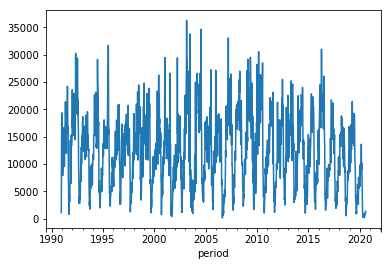

In [25]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation. Les pics sont au printemps et les creux à la fin de l'été.

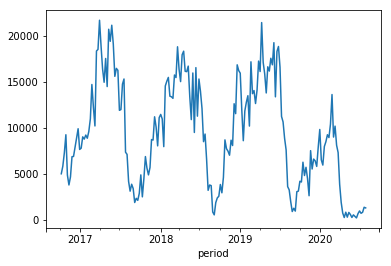

In [27]:
sorted_data['inc'][-200:].plot()

# Etude de l'incidence annuelle

Etant donné que le pic ce situe vers septembre, nous définissons la période de référence entre deux minima de l'incidence, du 1er septembre de l'année  𝑁  au 1er septembre de l'année  𝑁+1 .

Notre tâche est un peu compliquée par le fait que l'année ne comporte pas un nombre entier de semaines. Nous modifions donc un peu nos périodes de référence: à la place du 1er août de chaque année, nous utilisons le premier jour de la semaine qui contient le 1er septembre.

Comme l'incidence de la varicelle est très faible en été, cette modification ne risque pas de fausser nos conclusions.

Nous commençons donc l'analyse en 1991. Car 1990 n'est pas complète.

In [34]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [36]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

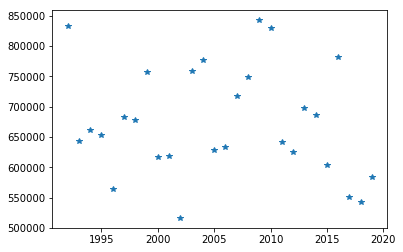

In [37]:
yearly_incidence.plot(style='*')

In [46]:
print("incidence max en ", yearly_incidence.idxmax())
print("incidence min en ", yearly_incidence.idxmin())

incidence max en  2009
incidence min en  2002
